In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [3]:
df=pd.read_csv(r"D:\sofronics\Datasets\Heart_Disease_Prediction.csv")

In [4]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [6]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [7]:
df['Heart Disease'] = df['Heart Disease'].replace(['Presence', 'Absence'], [1, 0])

In [8]:
df['Heart Disease'].unique()

array([1, 0], dtype=int64)

In [9]:
df.dtypes

Age                          int64
Sex                          int64
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
Heart Disease                int64
dtype: object

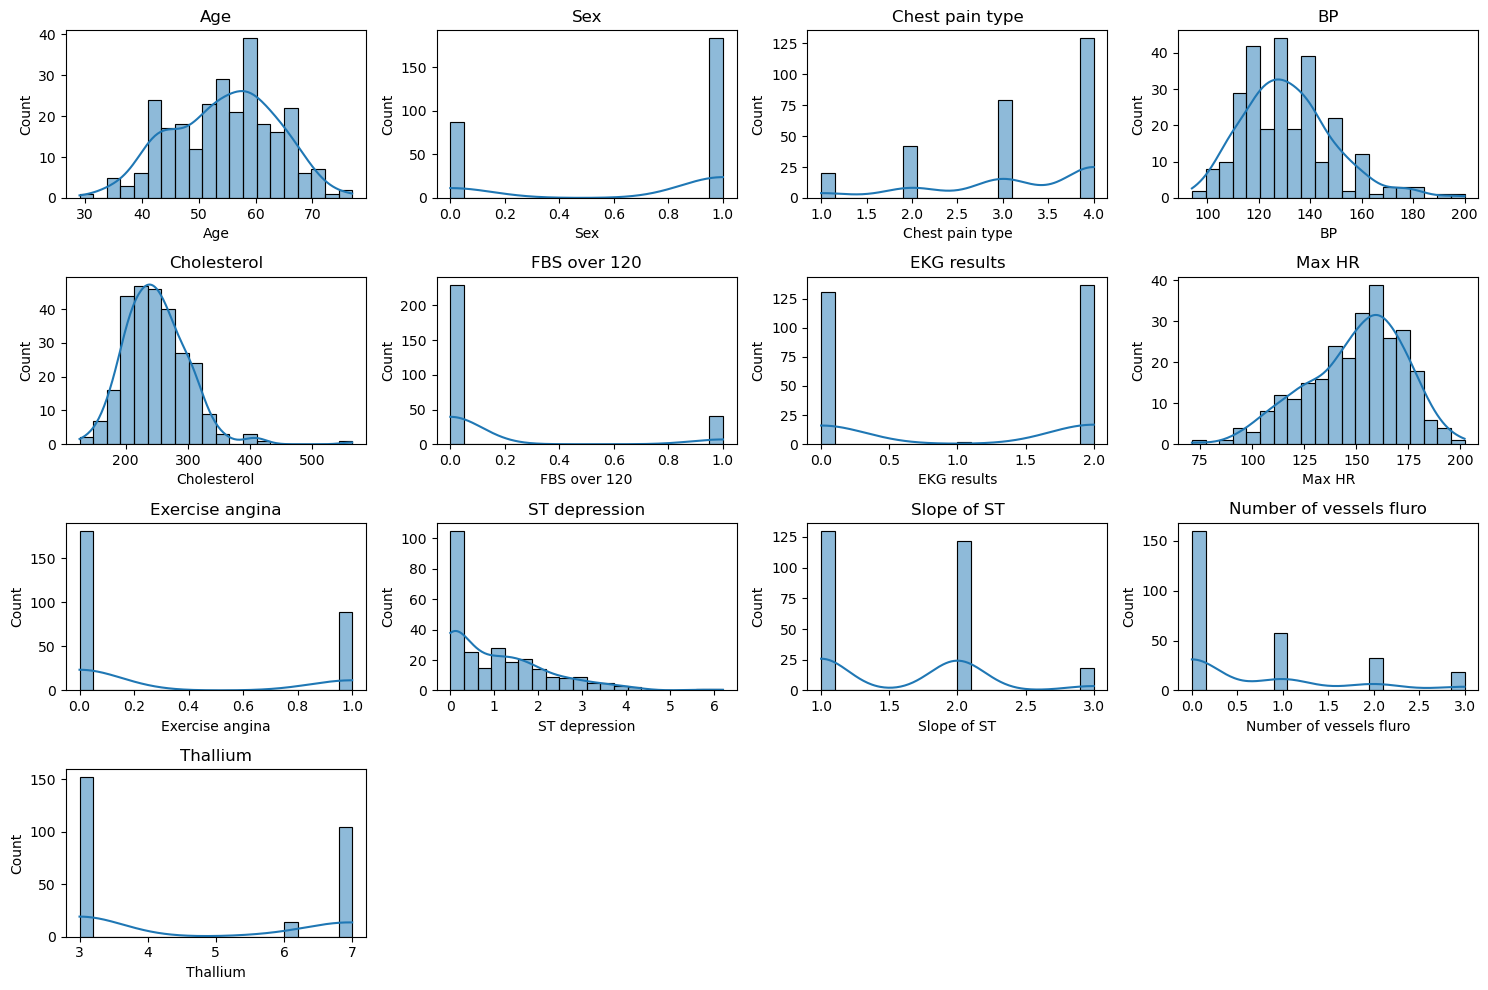

In [10]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[column], bins=20, kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

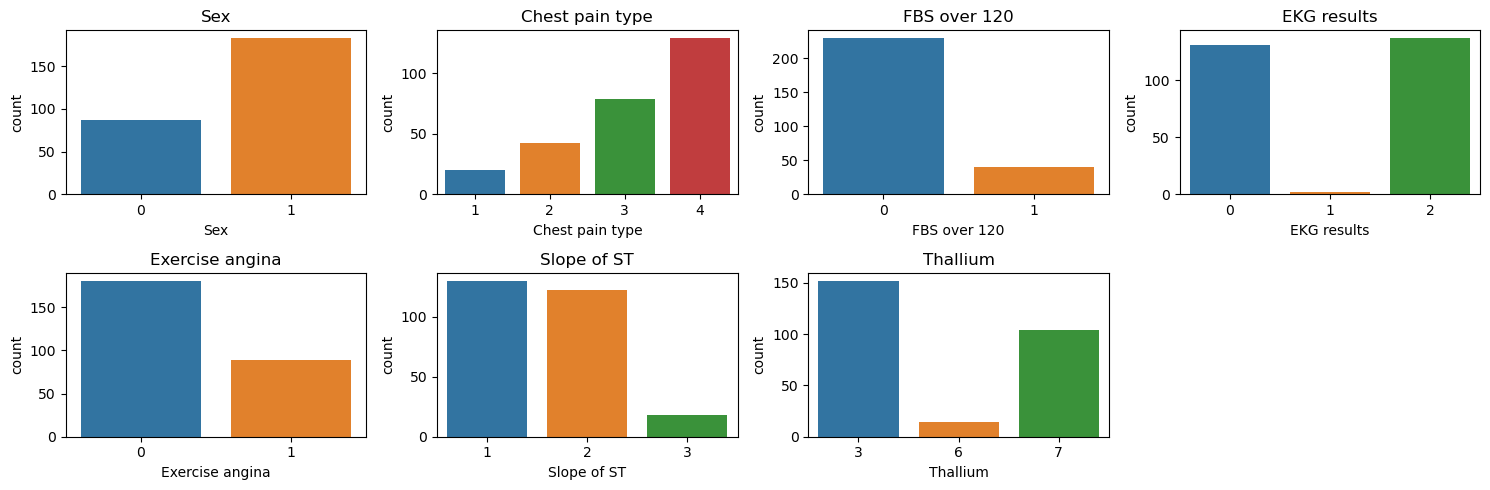

In [11]:
plt.figure(figsize=(15, 5))
for i, column in enumerate(['Sex', 'Chest pain type', 'FBS over 120', 'EKG results', 'Exercise angina', 'Slope of ST', 'Thallium']):
    plt.subplot(2, 4, i+1)
    sns.countplot(x=column, data=df)
    plt.title(column)
plt.tight_layout()
plt.show()

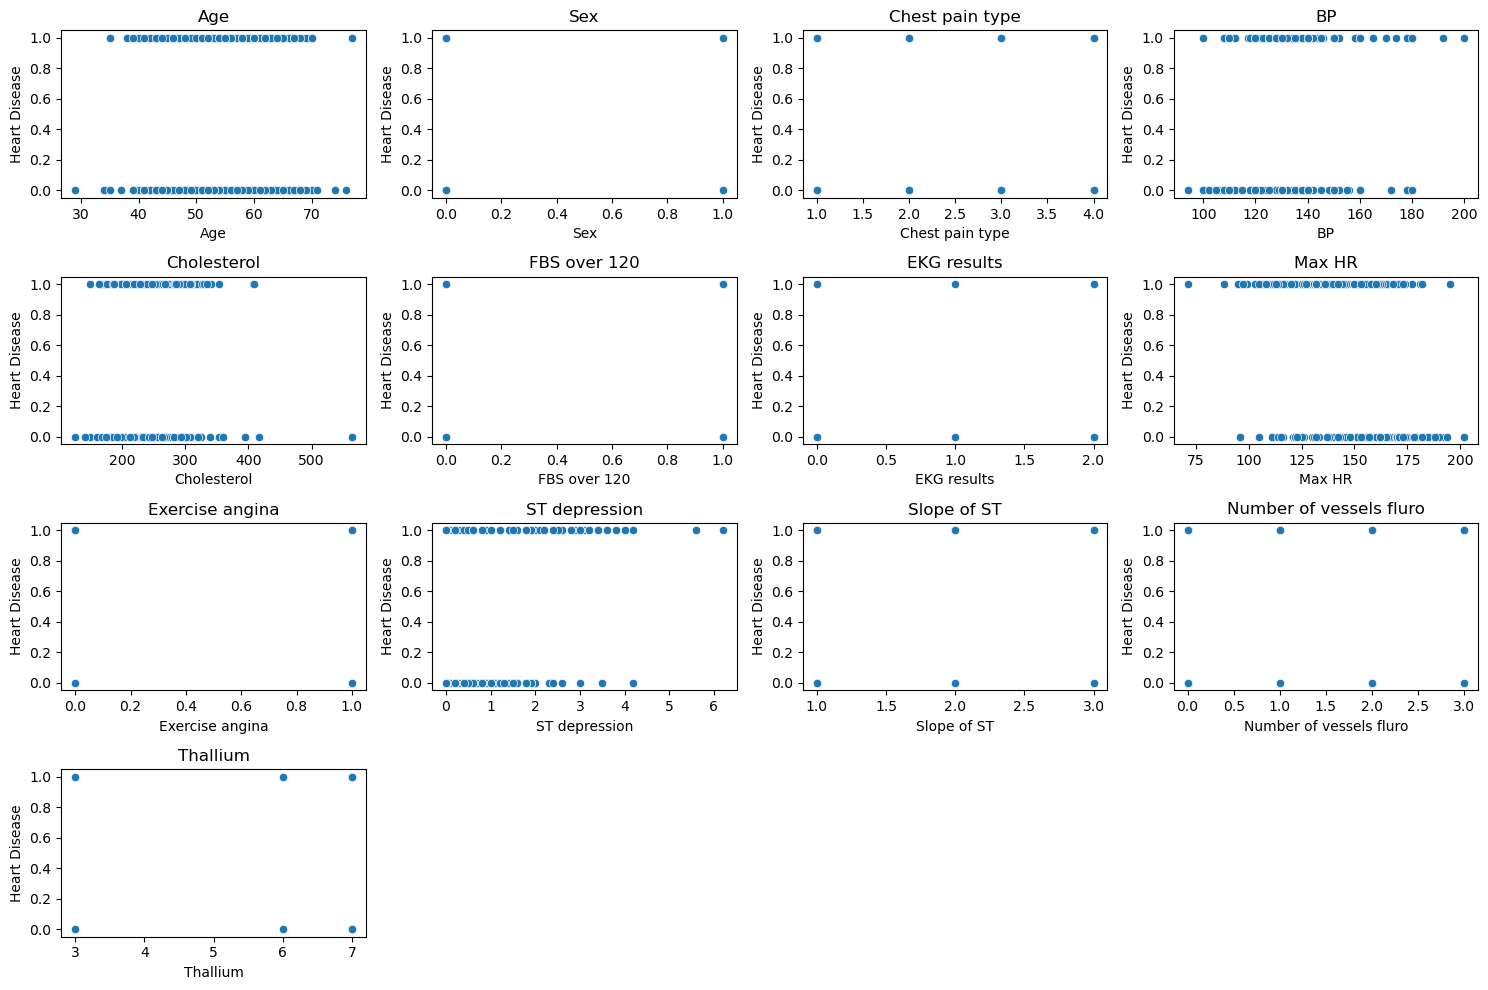

In [12]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(4, 4, i+1)
    sns.scatterplot(x=column, y='Heart Disease', data=df)
    plt.title(column)
plt.tight_layout()
plt.show()

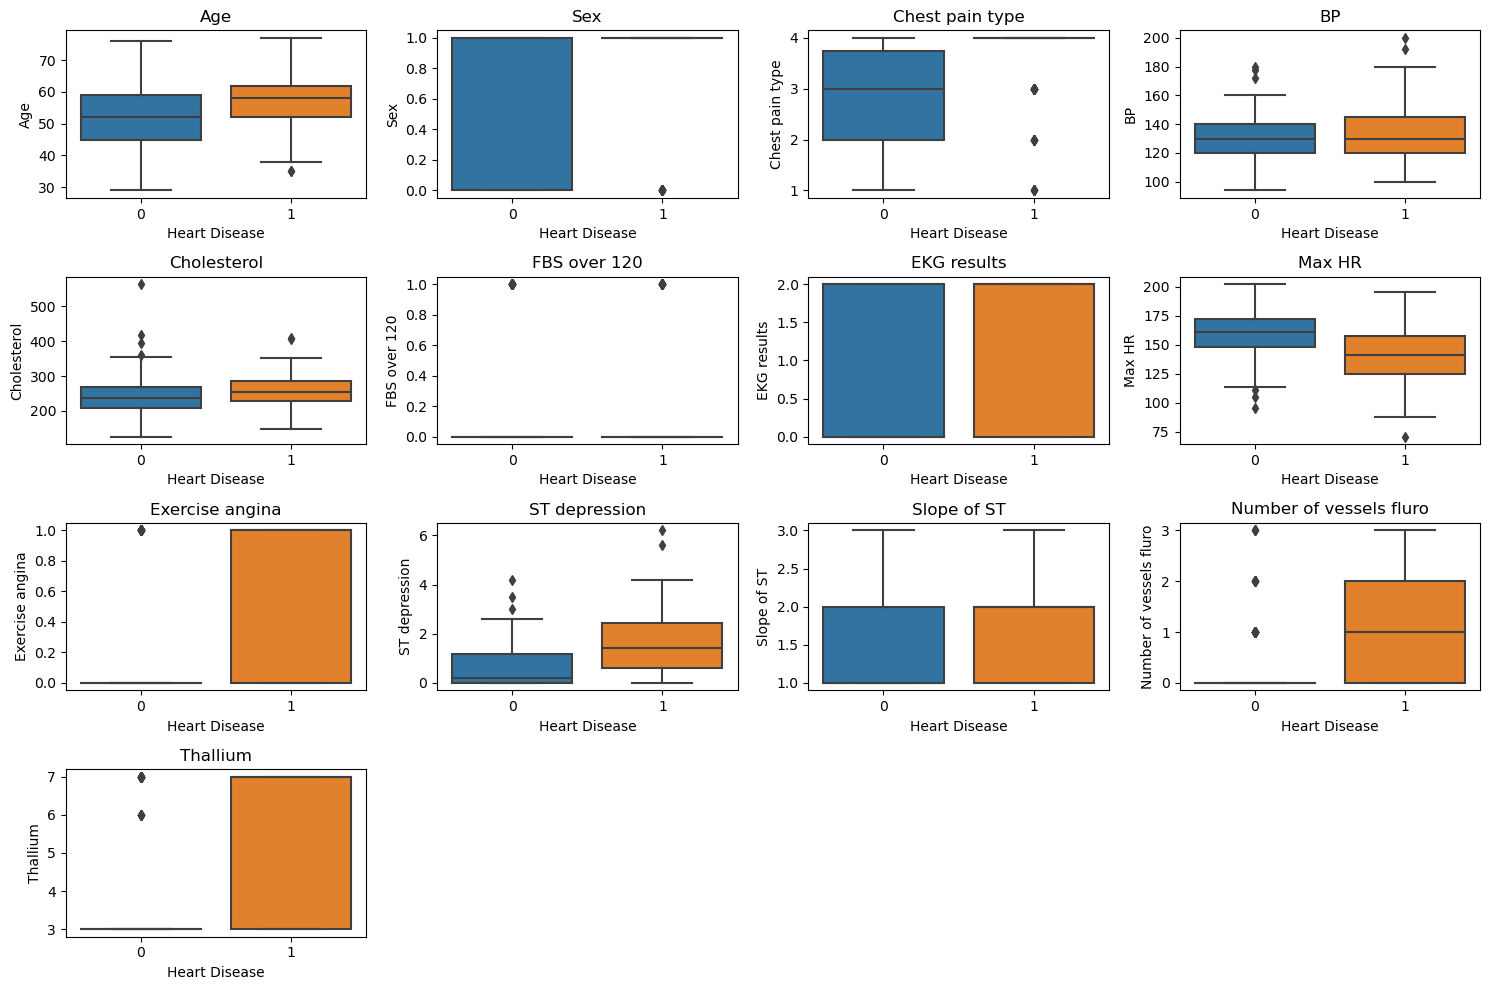

In [13]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(4, 4, i+1)
    sns.boxplot(x='Heart Disease', y=column, data=df)
    plt.title(column)
plt.tight_layout()
plt.show()

In [14]:
df.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

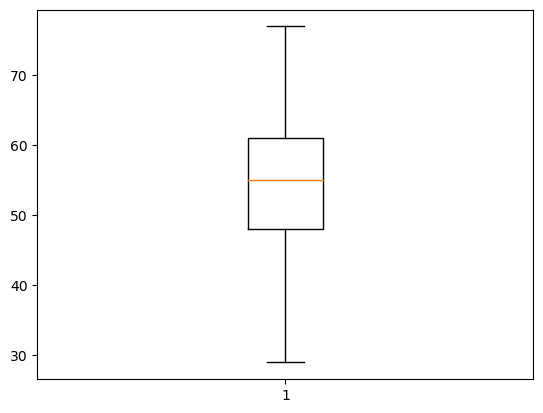

In [15]:
plt.boxplot(df['Age'])
plt.show()

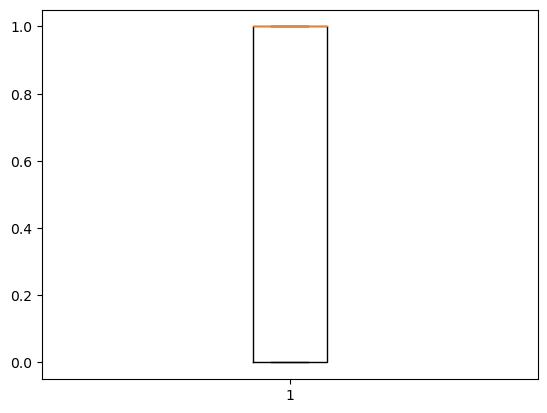

In [16]:
plt.boxplot(df['Sex'])
plt.show()

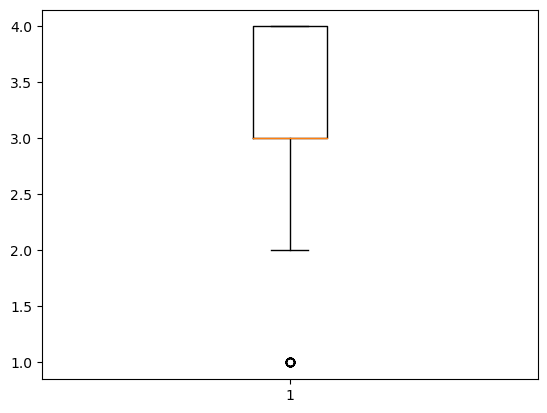

In [17]:
plt.boxplot(df['Chest pain type'])
plt.show()

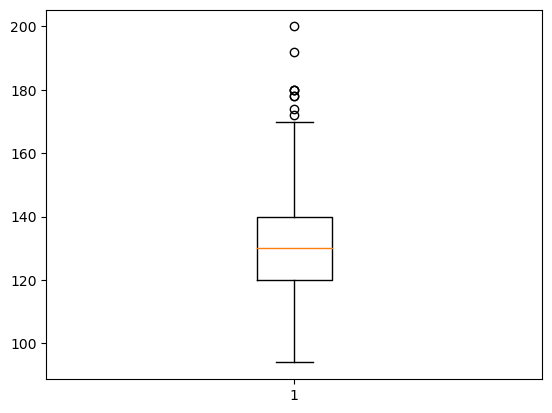

In [18]:
plt.boxplot(df['BP'])
plt.show()

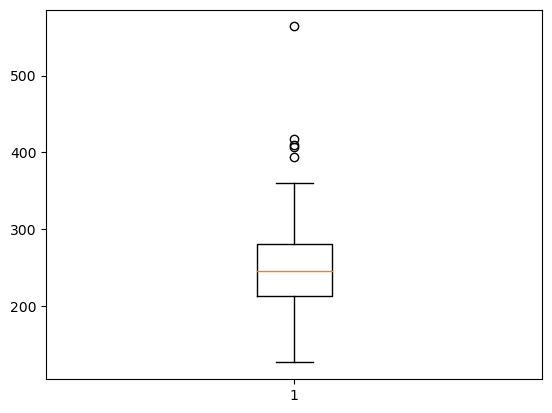

In [19]:
plt.boxplot(df['Cholesterol'])
plt.show()

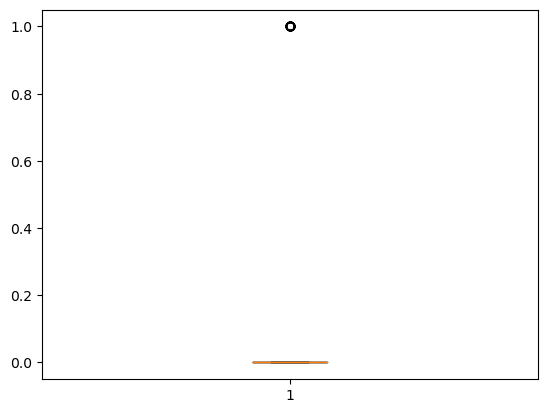

In [20]:
plt.boxplot(df['FBS over 120'])
plt.show()

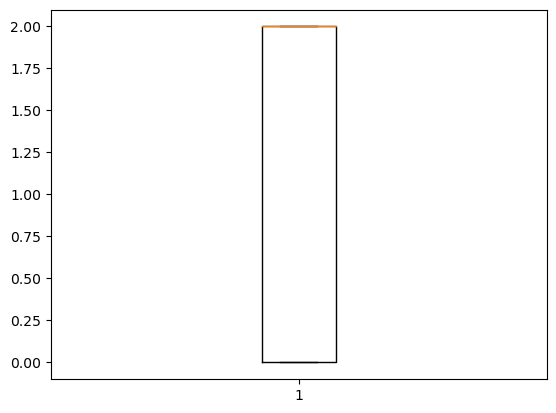

In [21]:
plt.boxplot(df['EKG results'])
plt.show()

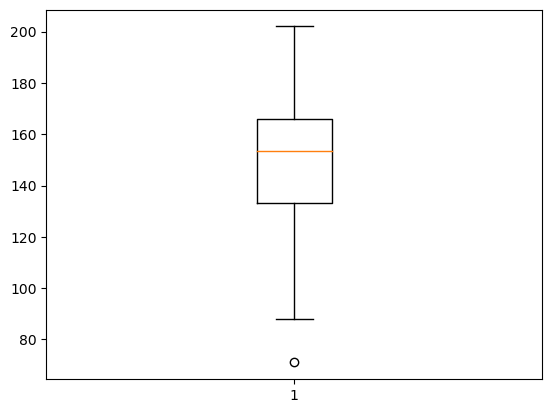

In [22]:
plt.boxplot(df['Max HR'])
plt.show()

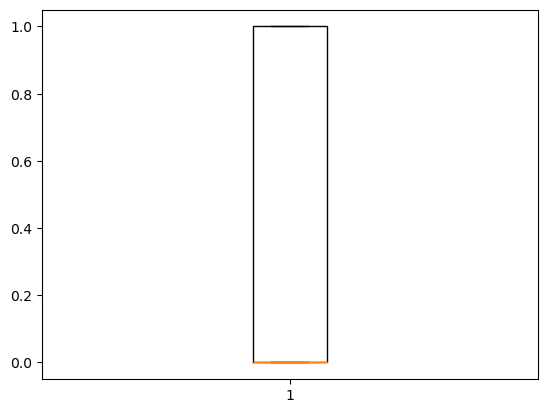

In [23]:
plt.boxplot(df['Exercise angina'])
plt.show()

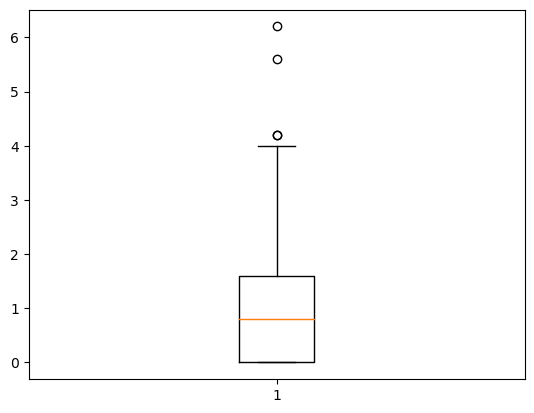

In [24]:
plt.boxplot(df['ST depression'])
plt.show()

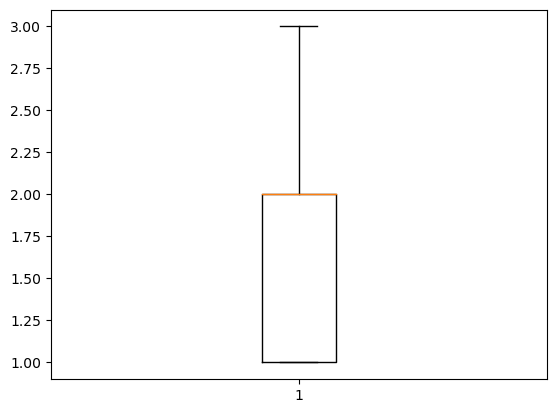

In [25]:
plt.boxplot(df['Slope of ST'])
plt.show()

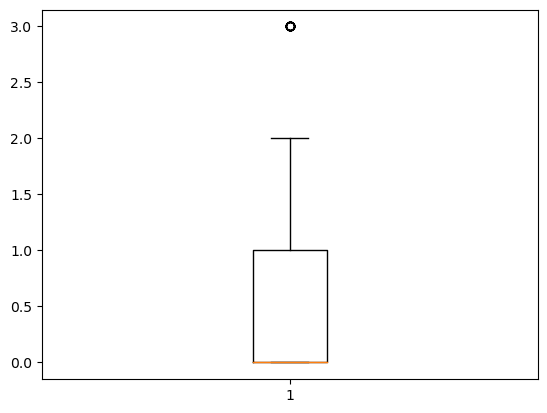

In [26]:
plt.boxplot(df['Number of vessels fluro'])
plt.show()

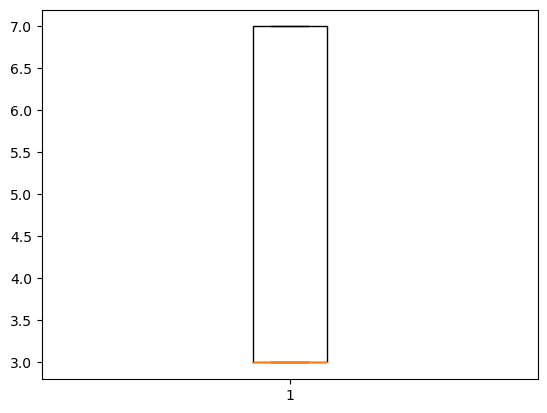

In [27]:
plt.boxplot(df['Thallium'])
plt.show()

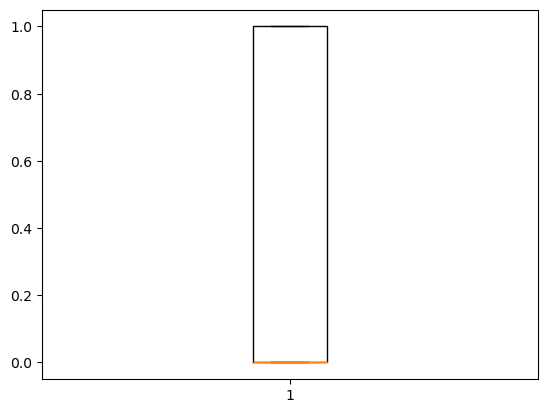

In [28]:
plt.boxplot(df['Heart Disease'])
plt.show()

In [29]:
def remove_outliers(d,c):
    #d is variable for df and c is the variable for column
    
    #find q1 and q3
    q1=d[c].quantile(0.25)
    q3=d[c].quantile(0.75)
    
    #calculate iqr(inter quantile range)
    iqr=q3-q1
    
    #find upper bound(ub)and lower bound(lb)
    ub=q3+1.5*iqr
    lb=q1-1.5*iqr
    
    #filter good data(ie eliminate outliers)
    data_without_outlier=d[(d[c]<=ub)&(d[c]>=lb)]
    
    return data_without_outlier

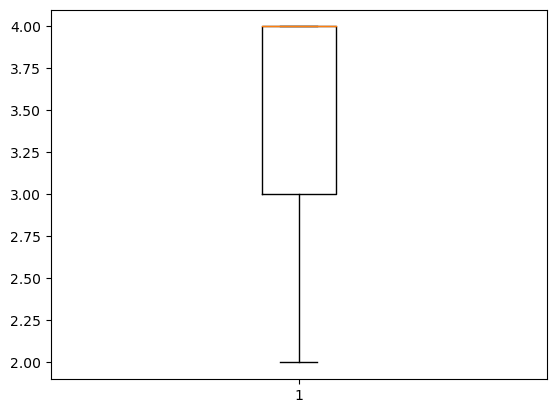

In [30]:
df=remove_outliers(df,'Chest pain type')
plt.boxplot(df['Chest pain type'])
plt.show()

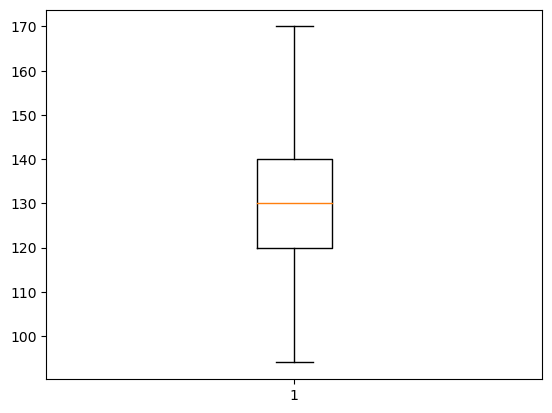

In [31]:
df=remove_outliers(df,'BP')
plt.boxplot(df['BP'])
plt.show()

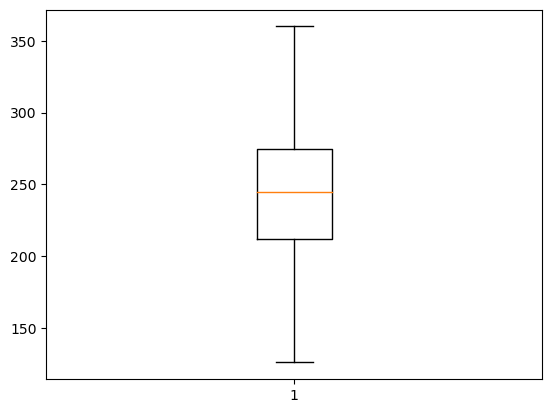

In [32]:
df=remove_outliers(df,'Cholesterol')
plt.boxplot(df['Cholesterol'])
plt.show()

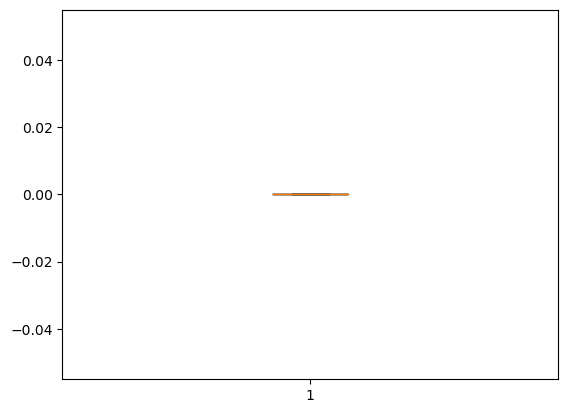

In [33]:
df=remove_outliers(df,'FBS over 120')
plt.boxplot(df['FBS over 120'])
plt.show()

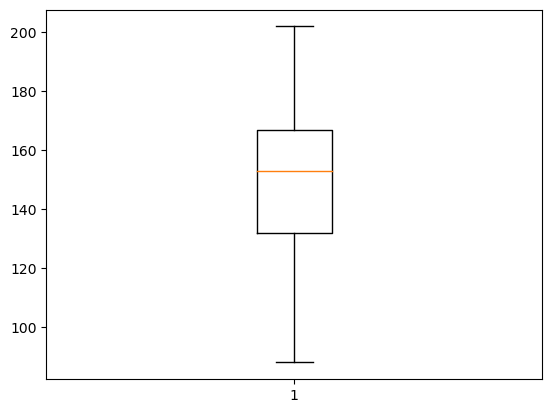

In [34]:
df=remove_outliers(df,'Max HR')
plt.boxplot(df['Max HR'])
plt.show()

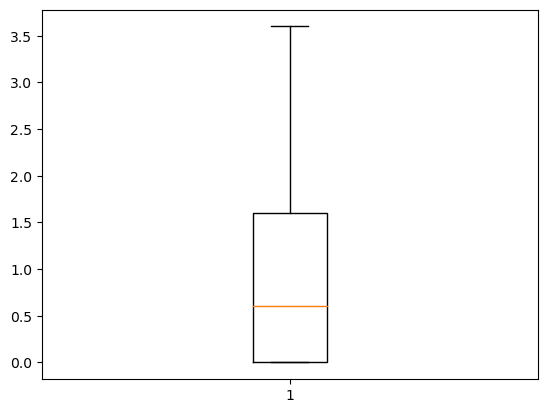

In [35]:
df=remove_outliers(df,'ST depression')
plt.boxplot(df['ST depression'])
plt.show()

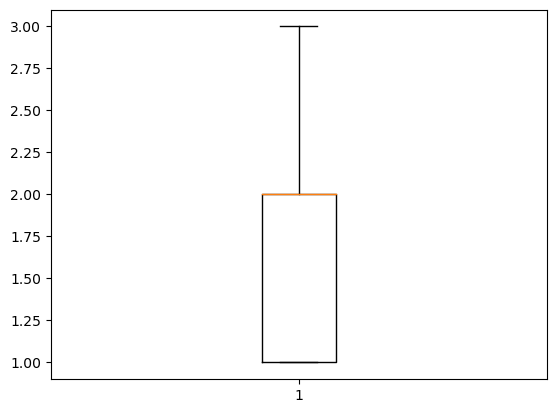

In [36]:

df=remove_outliers(df,'Slope of ST')
plt.boxplot(df['Slope of ST'])
plt.show()

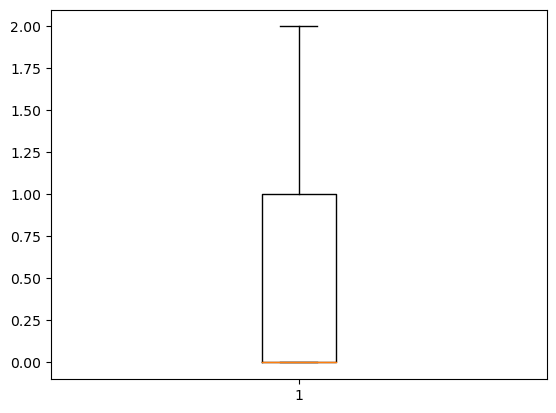

In [37]:

df=remove_outliers(df,'Number of vessels fluro')
plt.boxplot(df['Number of vessels fluro'])
plt.show()

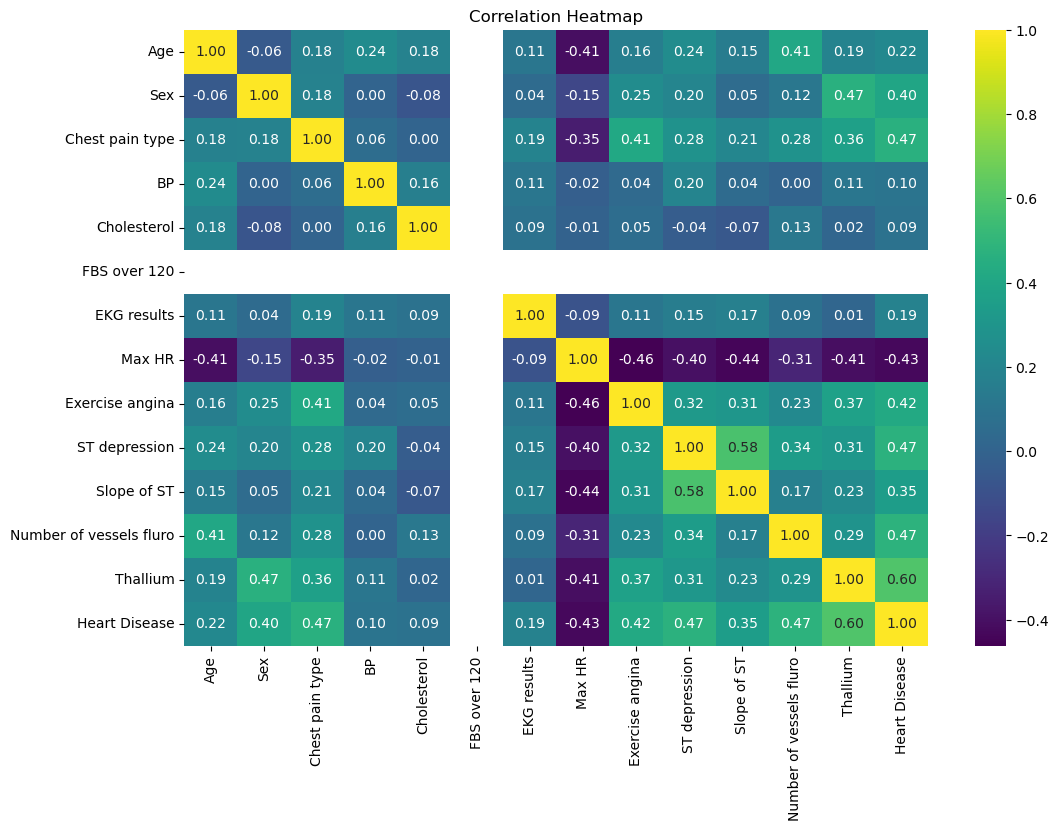

In [38]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="viridis", fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [39]:
x=df.drop('Heart Disease',axis=1)
y=df['Heart Disease']

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [41]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [50]:
import pickle as pkl
pkl.dump(scaler,open('D:\sofronics\models\Miniproject scaler.pkl','wb'))

In [43]:
# Initialize classifiers
classifiers = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

In [44]:
# Train and evaluate each classifier
for name, classifier in classifiers.items():
    # Train the classifier
    classifier.fit(x_train, y_train)
     # Predict on the testing data
    y_pred = classifier.predict(x_test)

In [45]:
ac = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print results
print(f"Classifier: {name}")
print("Accuracy:", ac)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("\n")


Classifier: Random Forest
Accuracy: 0.9137931034482759
Precision: 0.85
Recall: 0.8947368421052632
F1 Score: 0.8717948717948718
Confusion Matrix:
 [[36  3]
 [ 2 17]]




In [46]:
print(f"Classifier: {'SVM'}")
print("Accuracy:", ac)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("\n")


Classifier: SVM
Accuracy: 0.9137931034482759
Precision: 0.85
Recall: 0.8947368421052632
F1 Score: 0.8717948717948718
Confusion Matrix:
 [[36  3]
 [ 2 17]]




In [47]:
print(f"Classifier: {'KNN'}")
print("Accuracy:", ac)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("\n")

Classifier: KNN
Accuracy: 0.9137931034482759
Precision: 0.85
Recall: 0.8947368421052632
F1 Score: 0.8717948717948718
Confusion Matrix:
 [[36  3]
 [ 2 17]]




In [48]:
print(f"Classifier: {'Naive Bayes'}")
print("Accuracy:", ac)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("\n")

Classifier: Naive Bayes
Accuracy: 0.9137931034482759
Precision: 0.85
Recall: 0.8947368421052632
F1 Score: 0.8717948717948718
Confusion Matrix:
 [[36  3]
 [ 2 17]]




In [49]:
print(f"Classifier: {'Decision Tree'}")
print("Accuracy:", ac)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("\n")

Classifier: Decision Tree
Accuracy: 0.9137931034482759
Precision: 0.85
Recall: 0.8947368421052632
F1 Score: 0.8717948717948718
Confusion Matrix:
 [[36  3]
 [ 2 17]]




In [51]:
pkl.dump(classifiers,open('D:\sofronics\models\Miniproject model.pkl','wb'))

In [52]:
x.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3
5,65,1,4,120,177,0,0,140,0,0.4,1,0,7
7,59,1,4,110,239,0,2,142,1,1.2,2,1,7


In [53]:
#load  the model pkl
with open('D:\sofronics\models\Miniproject model.pkl','rb')as model_file:
    model_data=pkl.load(model_file)
    
#load the scaler.pkl
with open('D:\sofronics\models\Miniproject scaler.pkl','rb')as scaler_file:
    data=pkl.load(scaler_file)
    
#Normalize using standard scaler
sample_input=np.array([57,1,2,124,261,0,0,141,0,0.3,1,0,7]).reshape(-1,13)
processdata=data.transform(sample_input)

#reshape(-1,4), the array will be reshaped into a 2D array with four columns

#find ypred
model_predict=model_data.predict(processdata)


#print the predicted class with decoded category label

if model_predict==0:
    print('Heart disease not present')
else:
    print('Heart disease present')

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


AttributeError: 'dict' object has no attribute 'predict'